In [25]:
%reload_ext autoreload
%autoreload 2
from rls_general import *
import matplotlib.pyplot as plt
from time import time

In [ ]:
# Data generation for Nd-D case
N = 100000000000
Nd = 32
A, (X,Y) = data_gen(N,Nd,snr=100)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

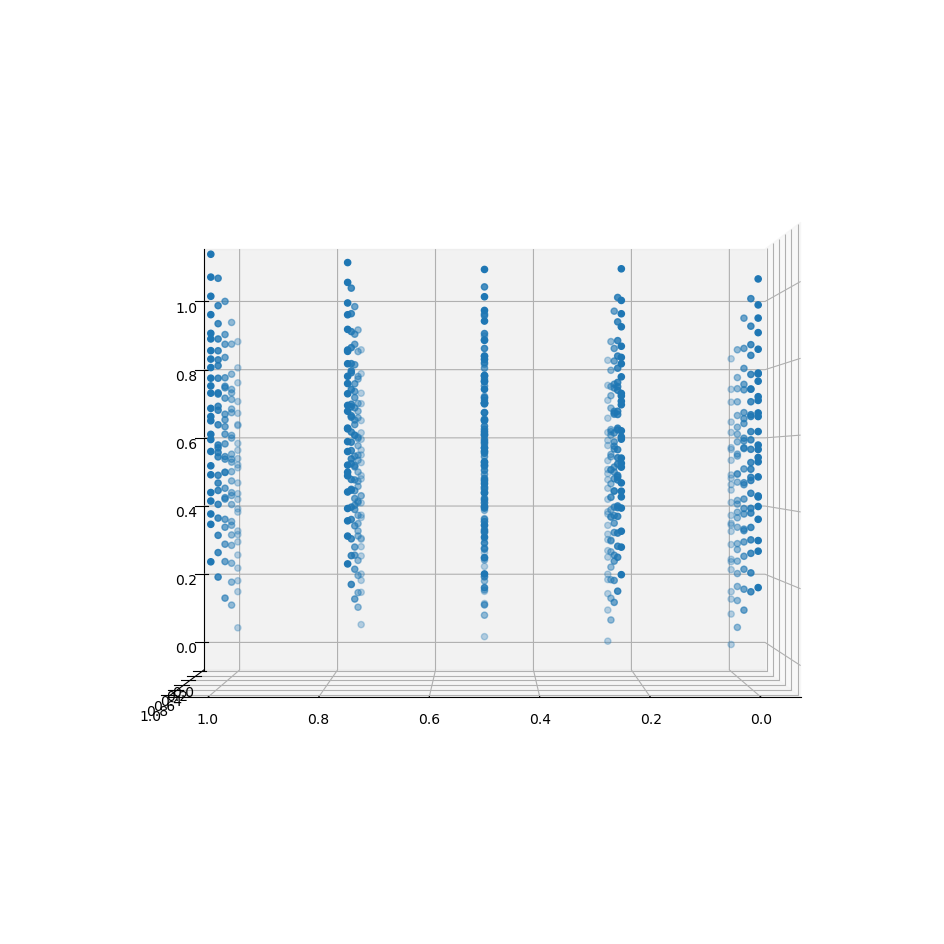

In [251]:
# Scatter Plot 

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=0, azim=90)


sequence_containing_x_vals = [X[i][0] for i in range(len(X))]
sequence_containing_y_vals = [X[i][1] for i in range(len(X))]
sequence_containing_z_vals = [Y[i] for i in range(len(Y))]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

# SURFACE TIME
Nper = int(N**(1/2))
x = y = np.linspace(0,1,Nper)
mesh = np.meshgrid(x,y)

Xmod = [x.flatten() for x in mesh]
Xmod = np.stack(Xmod).T
    
# Apply transform for each point
Ypred = [x@A for x in Xmod]
Ypred = np.array(Ypred)
Ypred = Ypred.reshape(Nper,Nper)

ax.plot_surface(mesh[0],mesh[1],Ypred)

# Plot hyperplane with A






# LMS Algorithm

In [8]:
Apred = LMS_fit(X,Y)

LinAlgError: Singular matrix

In [9]:
print('GT:',[A[i][0] for i in range(Nd)])
print('LMS:',[Apred[i][0] for i in range(Nd)])

GT: [0.946467796646419, 0.5138705562007082, 0.17847778443556406, 0.6082686865368634, 0.2898179354737549, 0.47823611581453807, 0.7275605026970247, 0.07260159055308768, 0.43651651211572773, 0.8091830432308722, 0.4583585226467536, 0.7365725176604735, 0.5080543094909958, 0.2983315085251772, 0.2696714693643407, 0.21801273248681585, 0.4468192635937873, 0.33463827044451955, 0.6366308372379117, 0.4668073650083945, 0.8238877257759321, 0.19056403235629815, 0.6371632821375639, 0.5322129463696473, 0.12712714576932438, 0.6466335191307891, 0.5268310698192878, 0.9963379239362354, 0.20727529924444787, 0.2952169620676378, 0.6262587140957288, 0.9873749493908223]


NameError: name 'Apred' is not defined

# WLS Algorithm

In [284]:
Ahist = WLS_fit(X,Y,lambd = 0.5)

LinAlgError: SVD did not converge

In [ ]:
print('GT:',[A[i][0] for i in range(Nd)])
print('WLS',[Ahist[-1][i,0] for i in range(Nd)])

# RLS Algorithm

In [ ]:
Ahist = RLS_fit(X,Y,lambd=0.1,delta=10)

In [ ]:
print('GT:',[A[i][0] for i in range(Nd)])
print('RLS',[Ahist[-1][i,0] for i in range(Nd)])